# PoC Advanced

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
path= 'C:/Users/USER/Desktop/dataset/deepL/na_processing/'
train = pd.read_csv(path+'train_preprocessed.csv')
test = pd.read_csv(path+'test_preprocessed.csv')

In [4]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True) # train에서 voted 제외한 전체 data

In [6]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

+ Tipi score 계산

In [7]:
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

In [8]:
# TIPI
tp_cols = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']
#train.groupby(tp_cols)['voted'].mean()
train[tp_cols+['mach_score']].corr(method='spearman')

,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,mach_score
Extraversion,1.000000,0.074520,0.046874,0.087655,0.231944,0.084890
Agreeableness,0.074520,1.000000,0.096895,0.077835,0.080684,0.478096
Conscientiousness,0.046874,0.096895,1.000000,0.282084,0.043331,0.107476
Emotional Stability,0.087655,0.077835,0.282084,1.000000,0.102359,-0.015156
Openness to Experiences,0.231944,0.080684,0.043331,0.102359,1.000000,-0.008133
mach_score,0.084890,0.478096,0.107476,-0.015156,-0.008133,1.000000


In [10]:
# tp 점수 
train[tp_cols].

Extraversion               6.5
Agreeableness              6.5
Conscientiousness          6.5
Emotional Stability        6.5
Openness to Experiences    6.5
dtype: float64

In [37]:
GnHnV = ['gender','hand','voted']
train[GnHnV]
GnH_grouping = train[GnHnV].groupby(['gender','hand'])['voted'].value_counts(normalize=True).unstack()
GnH_grouping

voted               1         2
gender hand                    
Female 1     0.462097  0.537903
       2     0.456701  0.543299
       3     0.429677  0.570323
Male   1     0.447233  0.552767
       2     0.461678  0.538322
       3     0.386792  0.613208

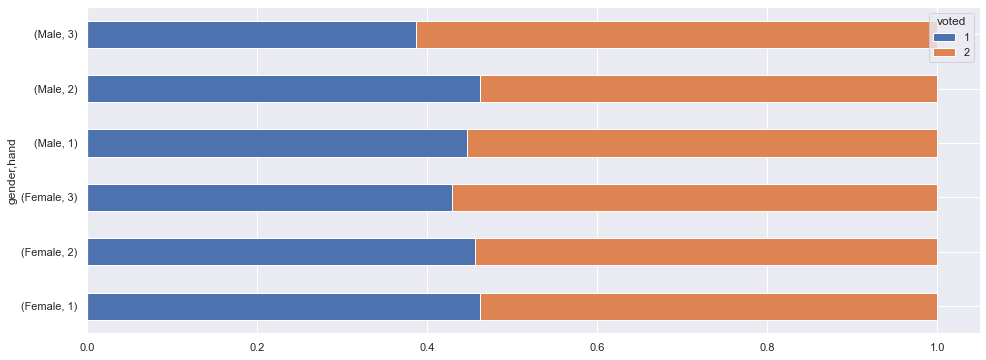

In [38]:
GnH_grouping.plot(kind='barh', stacked=True, figsize=[16,6])

+ 손만 봤을땐 오>왼>양 순으로 투표율

+ 하지만 성별이 들어가니 남자는 왼>오>양 순으로 투표율 / 여성은 그대로 유지

In [39]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_11,wr_12,wr_13,voted,mach_score,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,0,1,1,2,2.95,3.5,5.5,2.0,4.5,2.5
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,0,1,1,2,2.60,2.5,4.0,1.0,3.0,1.5
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,0,1,1,1,1.90,2.0,2.5,0.5,1.0,3.0
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,1,1,1,3.35,2.5,1.5,2.0,3.0,2.0
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,1,1,1,1,3.00,2.5,2.5,0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45524,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,602,...,0,1,1,2,4.15,0.5,3.5,6.0,5.5,2.0
45525,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,...,0,1,1,2,3.80,2.5,3.5,2.0,2.0,1.0
45526,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,1690,...,0,1,1,1,1.50,4.5,1.0,3.0,1.5,0.0
45527,5.0,747,3.0,1331,4.0,892,4.0,1281,5.0,1328,...,0,1,1,1,2.90,3.0,3.5,2.0,2.0,1.0


In [91]:
tp_column = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
tp_gender = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10','gender']
tp_g = train[tp_gender]
tp_g

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,gender
0,2,4,2,5,2,5,7,2,4,3,Female
1,1,5,0,6,1,4,3,2,0,2,Female
2,2,3,1,1,3,2,2,0,1,3,Male
3,2,2,1,5,1,3,1,3,1,3,Female
4,1,5,1,0,0,4,0,0,2,0,Male
...,...,...,...,...,...,...,...,...,...,...,...
45524,1,4,6,5,2,0,3,6,6,2,Female
45525,2,4,2,3,1,3,3,2,1,1,Male
45526,4,2,2,2,0,5,0,4,1,0,Female
45527,1,4,0,2,0,5,3,4,2,2,Male


In [94]:
tp_g = tp_g.groupby(['gender'])[tp_column].mean()
tp_g

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
gender,,,,,,,,,,
Female,2.939338,3.067323,1.718743,3.392118,1.325076,3.370725,1.635421,2.380155,2.617452,1.593197
Male,3.085694,3.653176,1.812588,2.577311,1.345296,3.666267,2.379533,2.591724,1.978277,1.760139


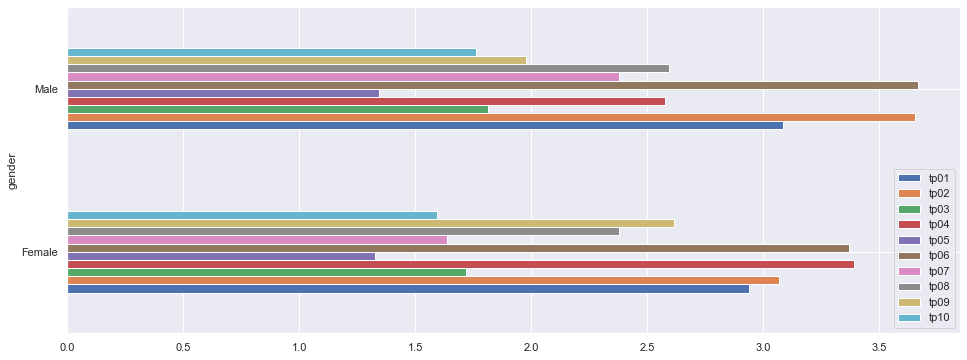

In [95]:
tp_g.plot(kind='barh',figsize=(16,6))

+ tp_04 와 tp_09 에 대해서만 여자가 평균적으로 점수가 더 높음

+ 성별 당 질문 응답 시간별 응답시간(중위 수)

In [130]:
Q_T_column = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE','gender']
train[Q_T_column].groupby(['gender']).median()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
gender,,,,,,,,,,,,,,,,,,,,
Female,563.0,1212.0,899.0,934.0,1164.0,703.0,767.0,1399.0,1748.0,1225.0,1100.0,1114.0,902.0,590.0,876.0,957.0,640.0,1124.0,742.0,1013.0
Male,550.0,1222.5,898.0,930.0,1143.0,721.0,775.0,1521.0,1846.0,1292.0,1247.0,1133.0,909.0,603.0,888.0,983.0,661.0,1111.0,750.0,1026.0


- 성별 당 질문 응답 시간별 응답시간(평균)

In [127]:
train[Q_T_column].groupby(['gender'].mean()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
gender,,,,,,,,,,,,,,,,,,,,
Female,1007.672625,2159.382923,1463.034858,1402.344828,1890.821581,2451.143279,1336.227727,2146.862820,3818.470701,2254.885339,1919.408351,5358.292376,2422.955993,953.173540,1343.458269,1521.397748,1074.038377,1839.612010,1173.406474,2829.622472
Male,890.563021,2216.392954,1503.021021,1568.554844,1906.768357,1322.047121,1239.046626,6730.241472,4288.575287,2859.606137,2144.055216,2317.598827,1722.415916,965.693153,1517.139341,1732.299207,1224.891303,3026.581977,1155.873379,1721.269266


In [120]:
diff = train[Q_T_column].mean(axis=0) - train[Q_T_column].median(axis=0)

QaE     388.389422
QbE     971.702959
QcE     585.300973
QdE     559.741440
QeE     745.302664
QfE    1138.648334
QgE     512.543236
QhE    3120.472490
QiE    2268.489644
QjE    1316.498144
QkE     860.883832
QlE    2616.139494
QmE    1144.382965
QnE     363.831931
QoE     552.828263
QpE     663.562916
QqE     502.267522
QrE    1353.886380
QsE     417.081728
QtE    1220.159393
dtype: float64